In [1]:
import numpy
import matplotlib.pyplot as plt
import texplot
from glob import glob
from pprint import pprint
from os.path import join
import freealg as fa
import time

In [2]:
# =======
# get eig
# =======

def _get_eig(filename):
    data = numpy.load(filename, allow_pickle=True)['res'].item()
    eig = data['eig']
    subsize = data['subsize']
    wall_time = data['wall_time']
    proc_time = data['proc_time']
    
    return subsize, eig, wall_time, proc_time


# ==========
# read files
# ==========

def read_files(dir_, filename):

    filenames = sorted(glob(join(dir_, filename)))
    pprint(filenames)
    print('')
    
    eigs = []
    subsizes = []
    wall_times = []
    proc_times = []
    for filename in filenames:
        subsize, eig, wall_time, proc_time = _get_eig(filename)
        subsizes.append(subsize)
        eigs.append(eig)
        wall_times.append(wall_time)
        # print(f'wall_time: {wall_time/3600:>0.2f} hr')
        print(f'subsize: {subsize:>5d}, wall_time: {wall_time:>5.2f}, proc_time: {proc_time:>5.2f}')
    
    wall_times = numpy.array(wall_times)

    return subsizes, eigs, filenames

In [3]:
# ===============
# hist of log var
# ===============

def hist(eig, nbins, clip_x=None):
    """
    Histogram of the log os a variable.
    """
    
    u = eig

    if clip_x is not None:
        u = u[numpy.logical_and(u >= clip_x[0], u <= clip_x[1])]
    bins_u = numpy.linspace(u.min(), u.max(), nbins)
    counts, bin_edges = numpy.histogram(u, bins=bins_u, density=True)
    u_mid = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    lambda_ = u_mid
    density = counts
    return lambda_, density


# ===============
# hist of log var
# ===============

def hist_of_log_var(eig, nbins, clip_x=None):
    """
    Histogram of the log os a variable.
    """

    if clip_x is not None:
        eig = eig[numpy.logical_and(eig >= clip_x[0], eig <= clip_x[1])]
    
    u = numpy.log10(eig[eig>0])
    bins_u = numpy.linspace(u.min(), u.max(), nbins)
    counts, bin_edges = numpy.histogram(u, bins=bins_u, density=True)
    u_mid = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    lambda_ = u_mid
    density = counts
    return lambda_, density


# =================
# hist in log scale
# =================

def hist_in_log_scale(eig, nbins, clip_x=None):
    """
    Histogram of a variable itself, but in log scale.
    """

    if clip_x is not None:
        eig = eig[numpy.logical_and(eig >= clip_x[0], eig <= clip_x[1])]
    
    u = numpy.log10(eig[eig>0])
    bins_u = numpy.linspace(u.min(), u.max(), nbins)
    counts, bin_edges = numpy.histogram(u, bins=bins_u, density=True)
    u_mid = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    lambda_ = 10.0**u_mid
    density = counts / lambda_
    return lambda_, density


# ============
# get all hist
# ============

def get_all_hist(subsizes, eigs, clip_x):
    
    log_xs = []
    log_rhos = []
    xs = []
    rhos = []
    print('')
    
    for subsize, eig in zip(subsizes, eigs):
        
        nbins = int(numpy.log(subsize) * 15)
        print(f'nbins: {nbins}')
        
        # x, rho = hist_in_log_scale(eig, nbins)
        # x, rho = hist(eig, nbins, clip_x=[1e-2, 1e1])
        x, rho = hist_in_log_scale(eig, nbins, clip_x=clip_x)
        xs.append(x)
        rhos.append(rho)
        
        log_x, log_rho = hist_of_log_var(eig, nbins, clip_x=clip_x)
        log_xs.append(log_x)
        log_rhos.append(log_rho)
    print('')

    return xs, rhos, log_xs, log_rhos

# Loading Data

In [4]:
dir_ = '.'
filename = './data/cifar_resnet50_fp64_logm_n55K_eig_n[0-9][0-9][0-9][0-9][0-9].npz'
clip_x = [1e-2, 1e3]

subsizes, eigs, filenames = read_files(dir_, filename)

# Scale to adjust the matrix
num_model_param=23574015
scale = numpy.sqrt(num_model_param)
log_scale = numpy.log(scale)

for i in range(len(eigs)):
    eigs[i] = eigs[i] + log_scale

xs, rhos, log_xs, log_rhos = get_all_hist(subsizes, eigs, clip_x)

['././data/cifar_resnet50_fp64_logm_n55K_eig_n01024.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n02048.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n04096.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n08192.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n16384.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n32768.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n50056.npz']

subsize:  1024, wall_time:  0.50, proc_time:  6.53
subsize:  2048, wall_time:  0.32, proc_time: 10.22
subsize:  4096, wall_time:  1.82, proc_time: 50.90
subsize:  8192, wall_time: 12.50, proc_time: 358.90
subsize: 16384, wall_time: 94.30, proc_time: 2820.21
subsize: 32768, wall_time: 667.75, proc_time: 20451.25
subsize: 50056, wall_time: 2178.51, proc_time: 67331.13

nbins: 103
nbins: 114
nbins: 124
nbins: 135
nbins: 145
nbins: 155
nbins: 162



In [5]:
subsizes

[1024, 2048, 4096, 8192, 16384, 32768, 50056]

In [6]:
dir_ = '.'
filename = './data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_*.npz'
clip_x = [1e-2, 1e3]

subsizes_init, eigs_init, filenames_init = read_files(dir_, filename)

# Scale to adjust the matrix
num_model_param=23574015
scale = numpy.sqrt(num_model_param)
log_scale = numpy.log(scale)

for i in range(len(eigs_init)):
    eigs_init[i] = eigs_init[i] + log_scale

xs_init, rhos_init, log_xs_init, log_rhos_init = get_all_hist(subsizes_init, eigs_init, clip_x)

['././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_00.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_01.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_02.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_03.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_04.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_05.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_06.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_07.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_08.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_09.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_10.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_11.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_12.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01024_sample_13.npz',
 '././data/cifar_resnet50_fp64_logm_n55K_eig_n01

# Plotting PDF of Data

In [7]:
# ----------------------
# Estimatre pdf from eig
# ----------------------

pdfs_init = []
x = numpy.linspace(4, 14, 1000)
for i in range(len(subsizes_init)):
    eig_init = eigs_init[i]

    # tol = 1e-5
    # spikes = [1.0]
    # for spike in spikes:
    #     mask = ~np.isclose(eig, spike, atol=tol)
    #     eig = eig[mask]

    # pdf = scipy.stats.gaussian_kde(eigs[i], bw_method=0.1)(x)
    lam_m = numpy.min(eig_init)
    lam_p = numpy.max(eig_init)
    print(f'lam_m: {lam_m:>0.3f},  lam_p: {lam_p:>0.3f}')
    pdf_init = fa.kde(eig_init, x, lam_m=lam_m, lam_p=lam_p, h=0.0005, kernel='beta')
    
    pdfs_init.append(numpy.copy(pdf_init))

lam_m: 8.064,  lam_p: 8.778
lam_m: 8.063,  lam_p: 8.781
lam_m: 8.063,  lam_p: 8.780
lam_m: 8.063,  lam_p: 8.783
lam_m: 8.061,  lam_p: 8.780
lam_m: 8.064,  lam_p: 8.783
lam_m: 8.063,  lam_p: 8.774
lam_m: 8.062,  lam_p: 8.782
lam_m: 8.063,  lam_p: 8.779
lam_m: 8.056,  lam_p: 8.781
lam_m: 8.062,  lam_p: 8.784
lam_m: 8.059,  lam_p: 8.781
lam_m: 8.063,  lam_p: 8.786
lam_m: 8.063,  lam_p: 8.784
lam_m: 8.062,  lam_p: 8.776
lam_m: 8.063,  lam_p: 8.788
lam_m: 8.064,  lam_p: 8.786
lam_m: 8.065,  lam_p: 8.777
lam_m: 8.061,  lam_p: 8.781
lam_m: 8.058,  lam_p: 8.783


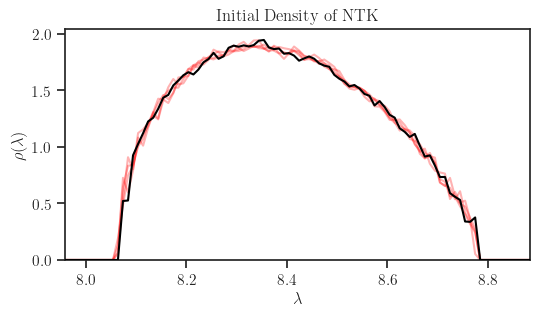

In [8]:
num_plots = len(pdfs_init)
cmap = plt.get_cmap('Reds')
colors = [cmap(i/(num_plots)) for i in range(num_plots + 1)][1:]

rc={'font.family': 'serif'}
with texplot.theme(rc=rc, use_latex=True):

    fig, ax = plt.subplots(figsize=(6, 3))
    
    # for i in range(len(pdfs_init)):
    for i in range(5):
        if i == 0:
            color = 'black'
            zorder = 30
            alpha = 1
        else:
            color = 'red'
            zorder = 1
            alpha = 0.3
        ax.plot(x, pdfs_init[i], color=color, alpha=alpha, zorder=zorder)
        ax.set_xlim([lam_m - 0.1, lam_p + 0.1])
        ax.set_ylim(bottom=0)
        ax.set_xlabel(r'$\lambda$')
        ax.set_ylabel(r'$\rho(\lambda)$')
        ax.set_title('Initial Density of NTK')
        # ax.legend(fontsize='small')

    save_filename = 'cifar_ntk_init_eigs.pdf'
    texplot.show_or_save_plot(plt, default_filename=save_filename,
                             transparent_background=True, dpi=200,
                                      show_and_save=False, verbose=True)

# Free Decompression

In [10]:
# ------------------------------------
# Selecting One of eigs as Initial eig
# ------------------------------------

# Storing format: batch_pdfs_pred : [batch][subsize][x_pred]

x_pred = numpy.linspace(4, 14, 1000)
batch_rhos_pred = []
batch_eigs_pred = []
batch_pdfs_pred = []

num_batch = len(eigs_init)
num_sizes = len(subsizes)
wall_times = numpy.zeros((num_batch, num_sizes), dtype=float)
proc_times = numpy.zeros((num_batch, num_sizes), dtype=float)

for i in range(num_batch):

    print(f'Batch: {i+1} / {len(eigs_init)}')
    eig_init = eigs_init[i]

    min_eig = numpy.min(eig_init)
    max_eig = numpy.max(eig_init)

    # FreeForm Object
    eps = 0.01
    ff = fa.FreeForm(eig_init, support=(min_eig - eps, max_eig + eps), delta=1e-6,
                     dtype='complex128', p=0.00001)
    lam_m = ff.lam_m
    lam_p = ff.lam_p

    # Fit
    psi = ff.fit(method='jacobi', K=50, alpha=2, beta=2, n_quad=60, reg=1e-2,
                 projection='beta', kernel_bw=0.001, damp='jackson', force=True,
                 continuation='pade', pade_p=3, pade_q=2, odd_side='left',
                 pade_reg=0, optimizer='de', plot=False)

    # ----------
    # Decompress
    # ----------
    
    rhos_pred = []
    eigs_pred = []
    pdfs_pred = []
    
    for j, subsize in enumerate(subsizes):

        print(f'\t subsize: {subsize:>5d} ... ', end='')
    
        init_wall_time = time.time()
        init_proc_time = time.process_time()
        
        rho_pred, _ = ff.decompress(subsize, x_pred, method='newton', max_iter=500,
                                    step_size=0.1, tolerance=1e-4)
        eig_pred = numpy.sort(fa.sample(x, rho_pred, subsize, seed=0))
        
        rhos_pred.append(numpy.copy(rho_pred))
        eigs_pred.append(numpy.copy(eig_pred))
    
        wall_times[i, j]  = time.time() - init_wall_time
        proc_times[i, j] = time.process_time() - init_proc_time
    
        print(f'wall_time: {wall_times[i, j]:>5.2f}, '
              f'proc_time: {proc_times[i, j]:>5.2f}', end='')

        # Regenerate PDF by sampling rho and apply KDE
        print(f' | regenerate PDF ... ', end='')
        lam_m = numpy.min(eig_pred)
        lam_p = numpy.max(eig_pred)
        pdf_pred = fa.kde(eig_pred, x_pred, lam_m=lam_m, lam_p=lam_p, h=0.001,
                          kernel='beta')
        pdfs_pred.append(numpy.copy(pdf_pred))
        print(' done.')

    # Save to batch lists
    batch_rhos_pred.append(rhos_pred)
    batch_eigs_pred.append(eigs_pred)
    batch_pdfs_pred.append(pdfs_pred)

    print('')

Batch: 1 / 20
	 subsize:  1024 ... wall_time:  0.00, proc_time:  0.00 | regenerate PDF ...  done.
	 subsize:  2048 ... wall_time:  0.44, proc_time:  0.44 | regenerate PDF ...  done.
	 subsize:  4096 ... wall_time:  0.47, proc_time:  0.47 | regenerate PDF ...  done.
	 subsize:  8192 ... wall_time:  0.46, proc_time:  0.46 | regenerate PDF ...  done.
	 subsize: 16384 ... wall_time:  0.70, proc_time:  0.70 | regenerate PDF ...  done.
	 subsize: 32768 ... wall_time:  0.64, proc_time:  0.64 | regenerate PDF ...  done.
	 subsize: 50056 ... wall_time:  0.55, proc_time:  0.55 | regenerate PDF ...  done.

Batch: 2 / 20
	 subsize:  1024 ... wall_time:  0.00, proc_time:  0.00 | regenerate PDF ...  done.
	 subsize:  2048 ... wall_time:  0.44, proc_time:  0.44 | regenerate PDF ...  done.
	 subsize:  4096 ... wall_time:  0.49, proc_time:  0.49 | regenerate PDF ...  done.
	 subsize:  8192 ... wall_time:  0.48, proc_time:  0.49 | regenerate PDF ...  done.
	 subsize: 16384 ... wall_time:  0.57, proc_tim

In [33]:
# -------------------
# Wall and Proc Times
# -------------------

wall_times_mean = numpy.mean(wall_times, axis=0)
proc_times_mean = numpy.mean(proc_times, axis=0)
wall_times_std = numpy.std(wall_times, axis=0)
proc_times_std = numpy.std(proc_times, axis=0)

pm = "\u00B1"
for j in range(num_sizes):
    print(f'sunsizes: {subsizes[j]:>5d} | '
          f'wall_time: {wall_times_mean[j]:5.2f} {pm} {wall_times_std[j]:>4.2f} | '
          f'proc_time: {proc_times_mean[j]:5.2f} {pm} {proc_times_std[j]:>4.2f}')
print('')

# plt.errorbar(subsizes, wall_times_mean, yerr=wall_times_std, color='black',
#              label='wall time')
# plt.errorbar(subsizes, proc_times_mean, yerr=proc_times_std, color='maroon',
#              label='proc time')
# plt.xscale('log', base=2)
# plt.legend(fontsize='x-small')
# plt.show()

sunsizes:  1024 | wall_time:  0.01 ± 0.00 | proc_time:  0.01 ± 0.00
sunsizes:  2048 | wall_time:  0.46 ± 0.06 | proc_time:  0.46 ± 0.06
sunsizes:  4096 | wall_time:  0.51 ± 0.09 | proc_time:  0.51 ± 0.08
sunsizes:  8192 | wall_time:  0.51 ± 0.04 | proc_time:  0.51 ± 0.04
sunsizes: 16384 | wall_time:  0.68 ± 0.17 | proc_time:  0.68 ± 0.17
sunsizes: 32768 | wall_time:  0.80 ± 0.18 | proc_time:  0.80 ± 0.18
sunsizes: 50056 | wall_time:  0.57 ± 0.11 | proc_time:  0.57 ± 0.11



In [26]:
# --------------
# Regenerate PDF
# --------------

pdfs = []

for i in range(len(subsizes)):

    print(f'{i}, ', end='')

    # Original data (loaded from file)
    eig = eigs[i]
    lam_m = numpy.min(eig)
    lam_p = numpy.max(eig)
    pdf = fa.kde(eig, x_pred, lam_m=lam_m, lam_p=lam_p, h=0.001, kernel='beta')
    pdfs.append(numpy.copy(pdf))

print(' Done.')

0, 1, 2, 3, 4, 5, 6,  Done.


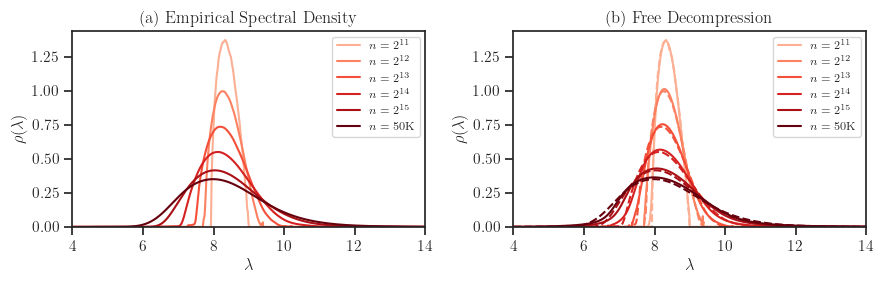

In [30]:
# ----
# Plot
# ----

num_plots = len(pdfs_pred)
cmap = plt.get_cmap('Reds')
colors = [cmap(i/(num_plots)) for i in range(num_plots + 1)][1:]

batch = 5

rc={'font.family': 'serif'}
with texplot.theme(rc=rc, use_latex=True):

    fig, ax = plt.subplots(figsize=(9, 3), ncols=2)
    
    for i in range(1, len(pdfs)):
        if i != len(pdfs) - 1:
            p = int(numpy.log2(subsizes[i]))
            label = rf'$n=2^{{{p}}}$'
        else:
            label = rf'$n={{{subsizes[i]//1000}}}$K'

        ax[0].plot(x_pred, pdfs[i], '-', color=colors[i], label=label)
        ax[1].plot(x_pred, pdfs[i], '--', color=colors[i])
        ax[1].plot(x_pred, batch_pdfs_pred[batch][i], color=colors[i], label=label)

    ax[0].set_xlim([4, 14])
    ax[0].set_ylim(bottom=0)
    ax[0].set_xlabel(r'$\lambda$')
    ax[0].set_ylabel(r'$\rho(\lambda)$')
    ax[0].set_title('(a) Empirical Spectral Density')
    ax[0].legend(fontsize='x-small')

    ax[1].set_xlim([4, 14])
    ax[1].set_ylim(bottom=0)
    ax[1].set_xlabel(r'$\lambda$')
    ax[1].set_ylabel(r'$\rho(\lambda)$')
    ax[1].set_title('(b) Free Decompression')
    ax[1].legend(fontsize='x-small')
    
    plt.tight_layout()

    save_filename = 'cifar_ntk_all_eigs_pred-batch.pdf'
    texplot.show_or_save_plot(plt, default_filename=save_filename,
                                      transparent_background=True, dpi=200,
                                      show_and_save=False, verbose=True)

In [34]:
plot_data = {
    'subsizes': subsizes,
    'eigs': eigs,
    'x_pred': x_pred,
    'pdfs': pdfs,
    'batch_rhos_pred': batch_rhos_pred,
    'batch_eigs_pred': batch_eigs_pred,
    'batch_pdfs_pred': batch_pdfs_pred,
    'wall_times': wall_times,
    'proc_times': proc_times,
}

numpy.save('./plot_data_cifar_ntk_batch.npy', plot_data)